In [458]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Basic DataFrame Operations

In [459]:
#  I Downloading dataset and loading in a datafram
df = pd.read_csv("results.csv", encoding='latin1')
df2 = pd.read_csv("final_dataset.csv")

In [460]:
# II First 5 rows of the dataset:
df.head(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [461]:
# II Summary of the dataset
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,11113.000000,11113.000000,10189.000000,10189.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.518222,1.141456,0.684758,0.501031,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396
std,1.301981,1.135907,0.836299,0.722299,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [462]:
df_copy = df #making copy of the dataset
pd.set_option('display.max_columns', None)

In [463]:
# III Selecting subset for indexing 
subset_label = df_copy[['HomeTeam', 'AwayTeam', 'HTR','FTR']] 
subset_position = df.iloc[:, [3, 4, 10, 7]]
condition = (df['FTHG'] > 2)
filtered_df = df[condition]
print("\nSubset of columns using label-based indexing:")
print(subset_label.head(1))

print("\nSubset of columns using position-based indexing:")
print(subset_position.head(1))

print("\nFiltered DataFrame based on a condition:")
print(filtered_df.head(1))


Subset of columns using label-based indexing:
  HomeTeam  AwayTeam  HTR FTR
0  Arsenal  Coventry  NaN   A

Subset of columns using position-based indexing:
   AwayTeam  FTHG Referee  HTHG
0  Coventry     0     NaN   NaN

Filtered DataFrame based on a condition:
    Season              DateTime     HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  \
1  1993-94  1993-08-14T00:00:00Z  Aston Villa      QPR     4     1   H   NaN   

   HTAG  HTR Referee  HS  AS  HST  AST  HC  AC  HF  AF  HY  AY  HR  AR  
1   NaN  NaN     NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  


# Data cleansing and preprocessing

In [464]:
#I Handling missing values
df.dropna(inplace=True)
df.head(1)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0


In [465]:
# II converting categorical into numerical
df_copy['HSAS'] = df_copy['HS'] + df_copy['AS']  

# Converting a categorical (FTR) variable into numerical representation using one-hot encoding
df_onehot = pd.get_dummies(df_copy, columns=['FTR'])

In [466]:
df_onehot.head(1)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAS,FTR_A,FTR_D,FTR_H
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,25.0,False,False,True


In [467]:
#III applying aggregation functions to grouper data
grouped_data = df.groupby('FTR')

aggregated_data = grouped_data.agg({'HS': ['sum', 'mean'], 'AS': 'count'})

print("Aggregated Data:")
print(aggregated_data)

Aggregated Data:
          HS               AS
         sum       mean count
FTR                          
A    28925.0  11.967315  2417
D    27296.0  13.192847  2069
H    55713.0  14.649750  3803


# Merging using different joins

In [468]:
# innerjoin
inner_join = pd.merge(df, df2, how='inner', on='HomeTeam')

# Outer Join
outer_join = pd.merge(df, df2, how='outer', on='HomeTeam')

# Left Join
left_join = pd.merge(df, df2, how='left', on='HomeTeam')

# Right Join
right_join = pd.merge(df, df2, how='right', on='HomeTeam')

In [469]:
inner_join.head(1)

,Season,DateTime,HomeTeam,AwayTeam_x,FTHG_x,FTAG_x,FTR_x,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAS,Unnamed: 0,Date,AwayTeam_y,FTHG_y,FTAG_y,FTR_y,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,25.0,0,19/08/00,Man City,4,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [470]:
outer_join.head(1)

,Season,DateTime,HomeTeam,AwayTeam_x,FTHG_x,FTAG_x,FTR_x,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAS,Unnamed: 0,Date,AwayTeam_y,FTHG_y,FTAG_y,FTR_y,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,25.0,0.0,19/08/00,Man City,4.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [471]:
left_join.head(1)

,Season,DateTime,HomeTeam,AwayTeam_x,FTHG_x,FTAG_x,FTR_x,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAS,Unnamed: 0,Date,AwayTeam_y,FTHG_y,FTAG_y,FTR_y,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,25.0,0.0,19/08/00,Man City,4.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [472]:
right_join.head(1)

,Season,DateTime,HomeTeam,AwayTeam_x,FTHG_x,FTAG_x,FTR_x,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAS,Unnamed: 0,Date,AwayTeam_y,FTHG_y,FTAG_y,FTR_y,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,25.0,0,19/08/00,Man City,4,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


# Visualization

In [473]:
df_copy['Goals'] = df['FTHG'] + df['FTAG']
df_copy = df_copy.reset_index()

I. Create a bar plot, line plot, and scatter plot using Pandas plotting functions. Customize the plots to make them more informative.

Text(0, 0.5, 'Goals')

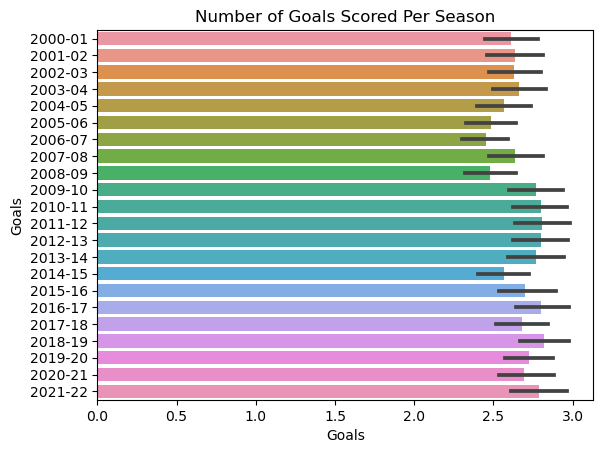

In [474]:
sns.barplot(x='Goals', y='Season', data=df)
plt.title('Number of Goals Scored Per Season') 
plt.ylabel('Goals')

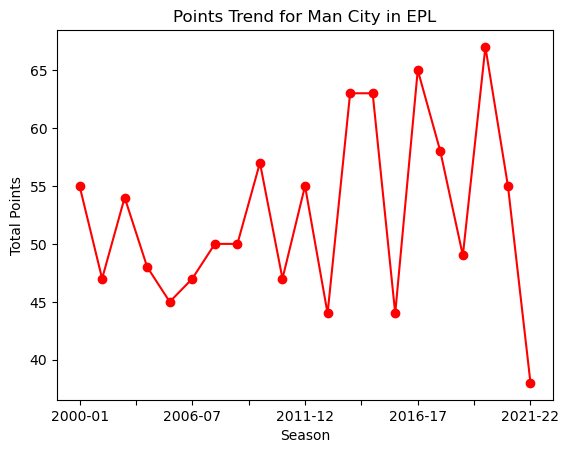

In [475]:
selected_team = 'Man City' 
team_points_trend = df[df['AwayTeam'] == selected_team].groupby('Season')['Goals'].sum()
team_points_trend.plot(kind='line', marker='o', linestyle='-', color='red')
plt.title(f'Points Trend for {selected_team} in EPL')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.show()

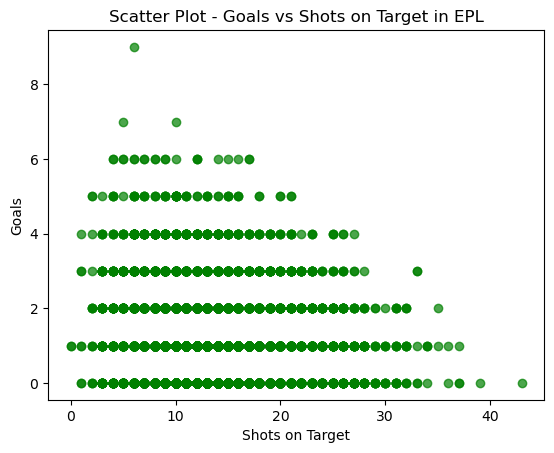

In [476]:
plt.scatter(df['HS'], df['FTAG'], color='green', alpha=0.7)
plt.title('Scatter Plot - Goals vs Shots on Target in EPL')
plt.xlabel('Shots on Target')
plt.ylabel('Goals')
plt.show()

II. Visualize the correlation matrix of numerical columns. Highlight highly correlated features.

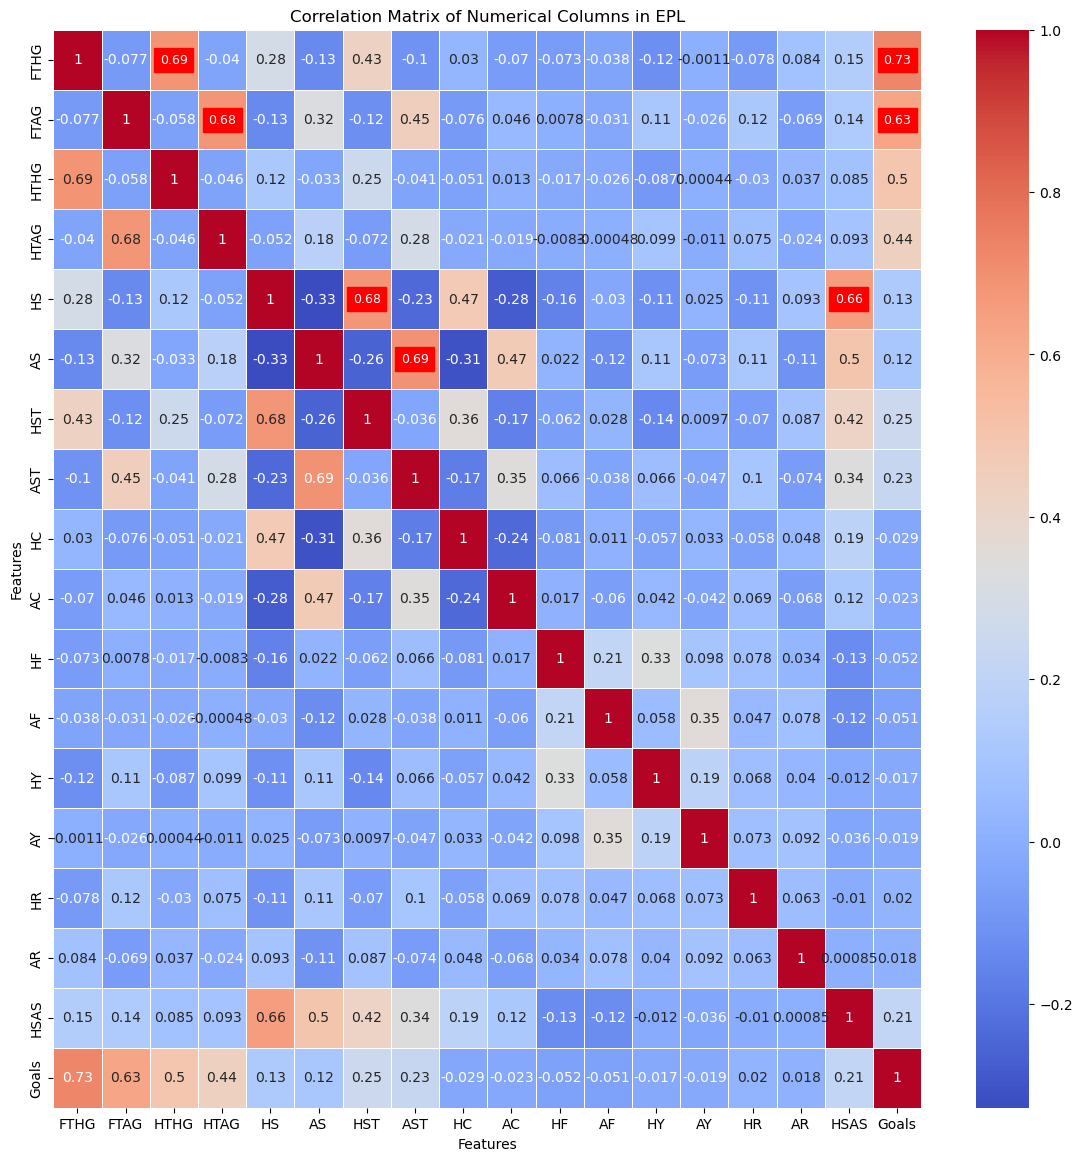

In [477]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

threshold = 0.6 
plt.title('Correlation Matrix of Numerical Columns in EPL')
plt.xlabel('Features')
plt.ylabel('Features')

for i in range(len(correlation_matrix.columns)):
    for j in range(i, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold and i != j:
            plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}', color='white',
                     ha='center', va='center', fontsize=9, bbox=dict(facecolor='red', edgecolor='red'))

plt.show()


III. Create histograms and box plots for numerical columns. Analyze the distribution and presence of outliers

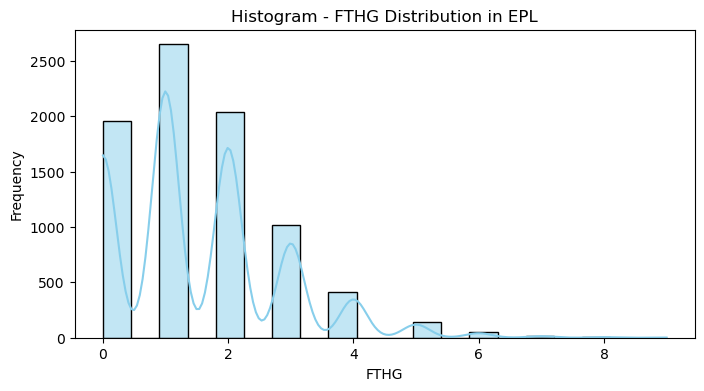

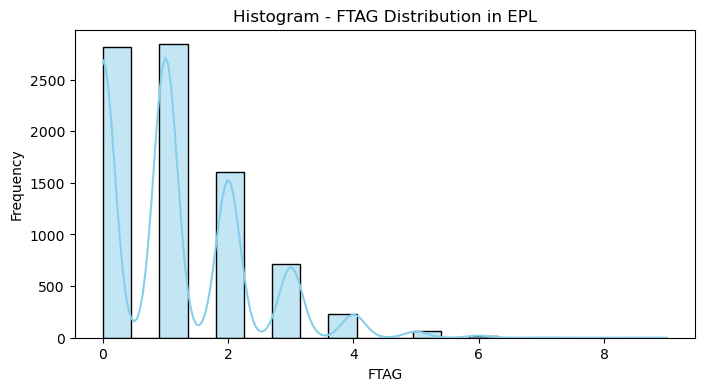

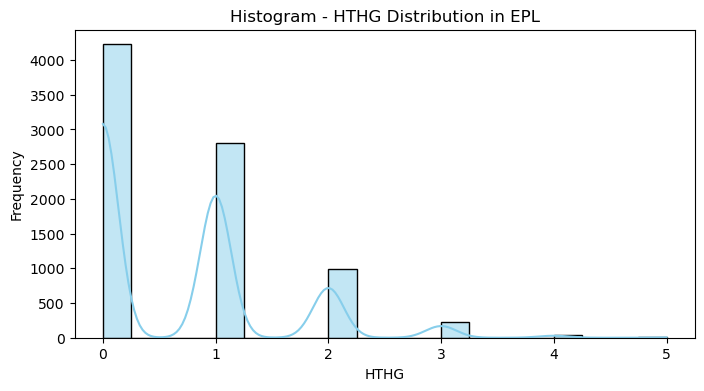

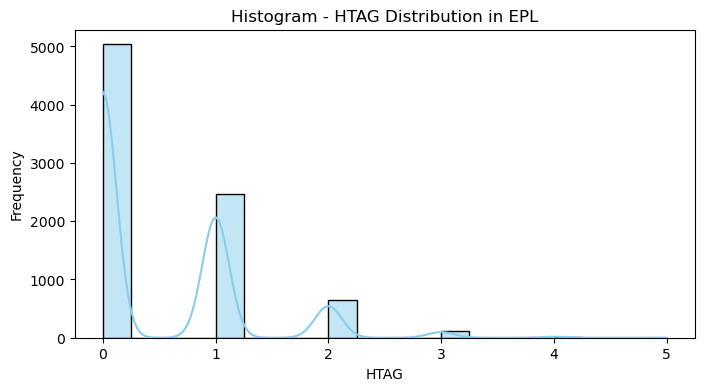

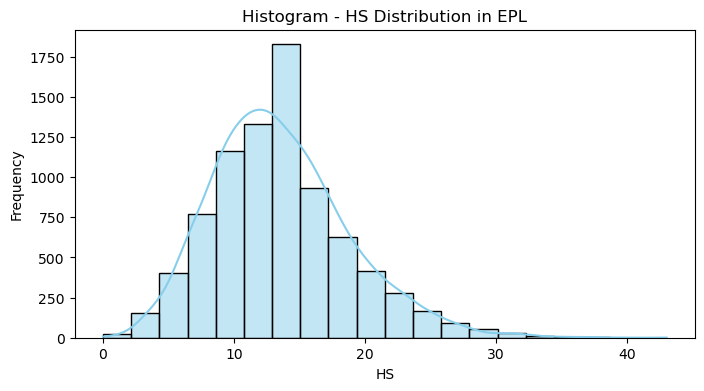

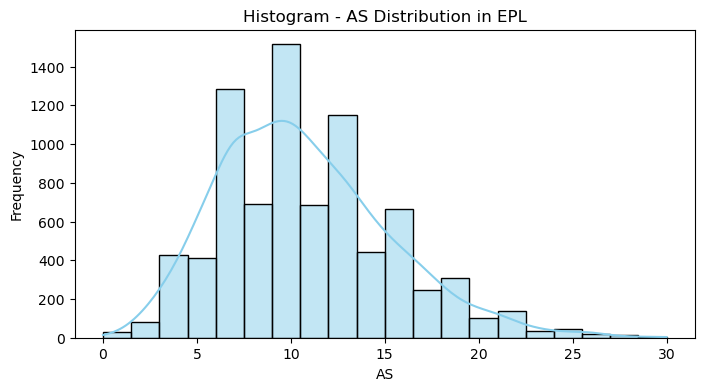

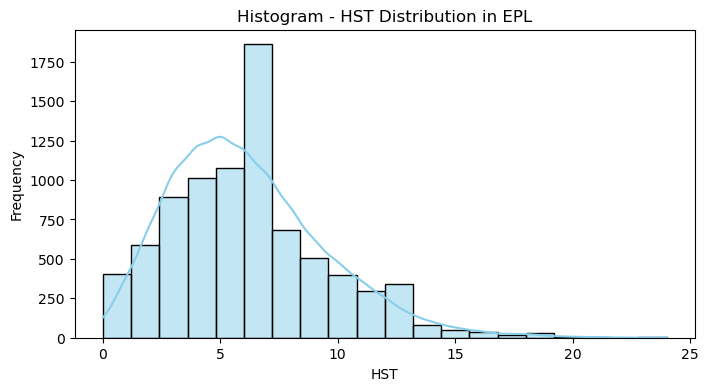

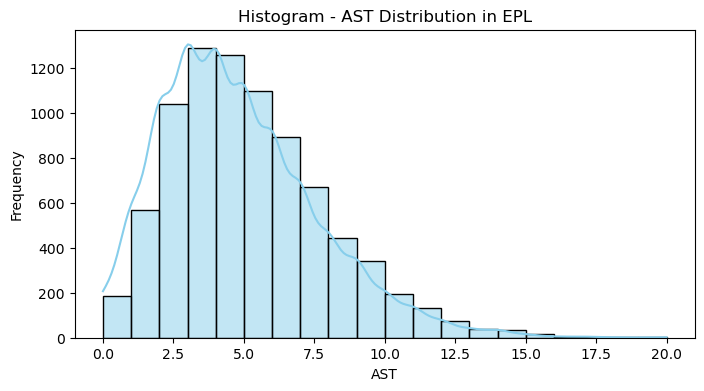

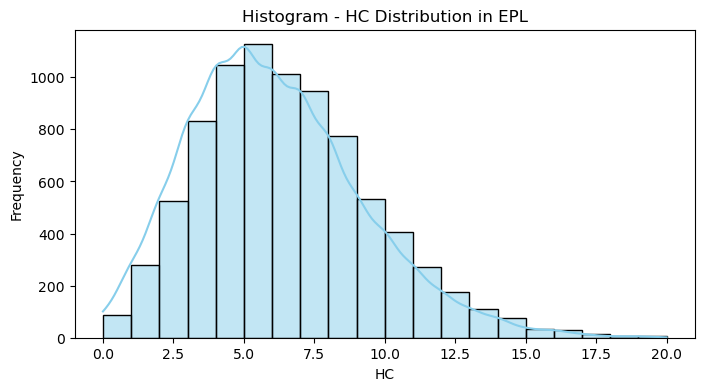

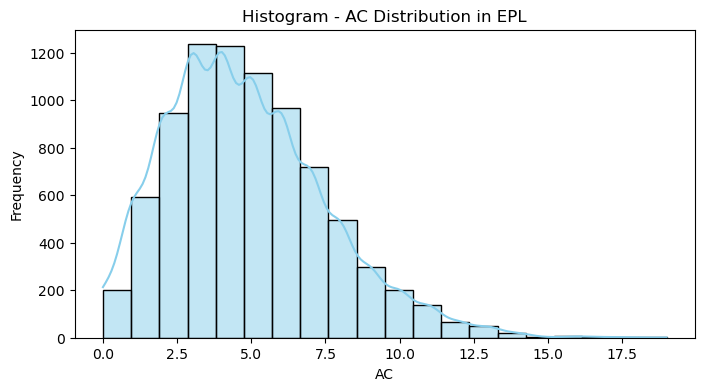

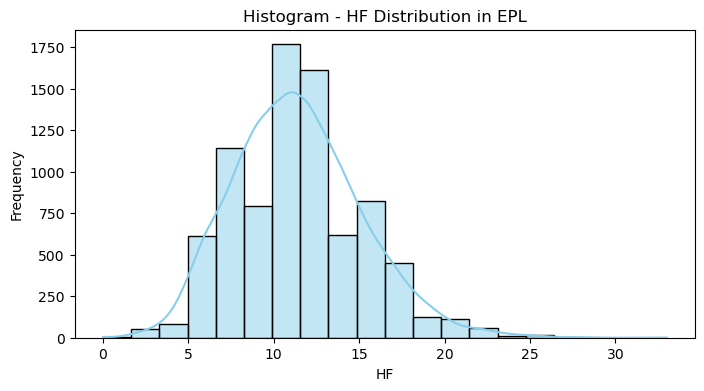

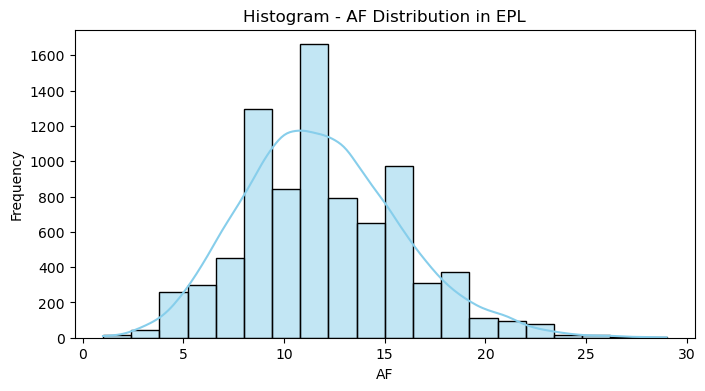

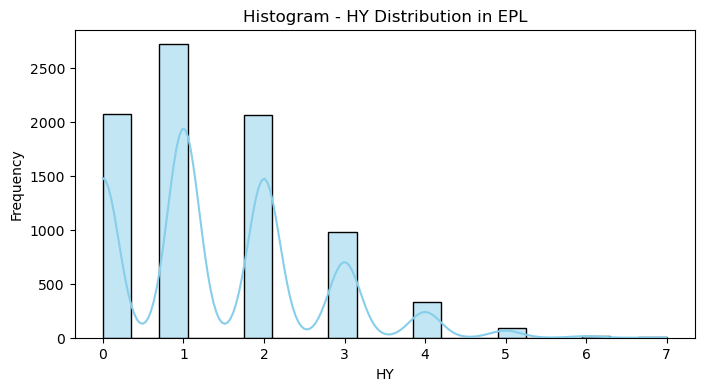

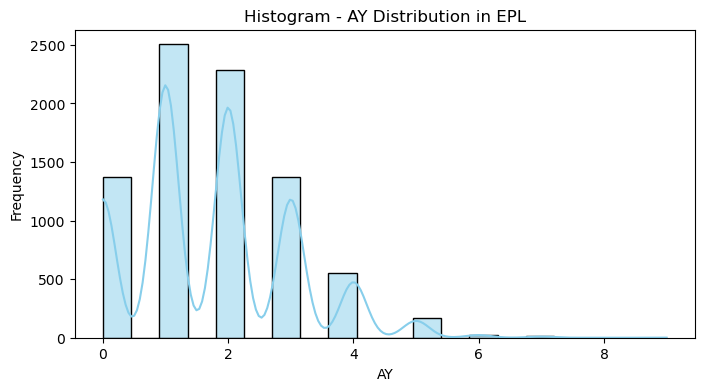

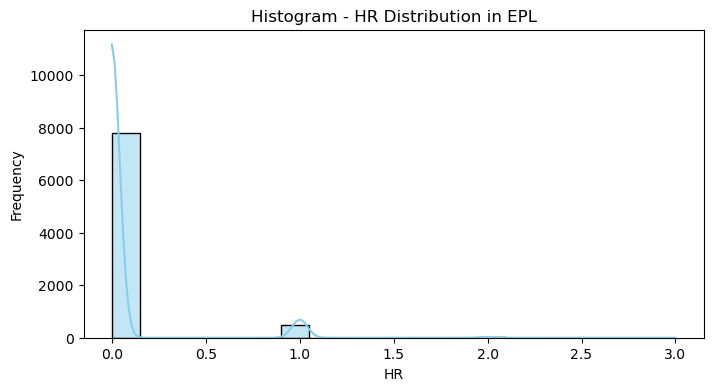

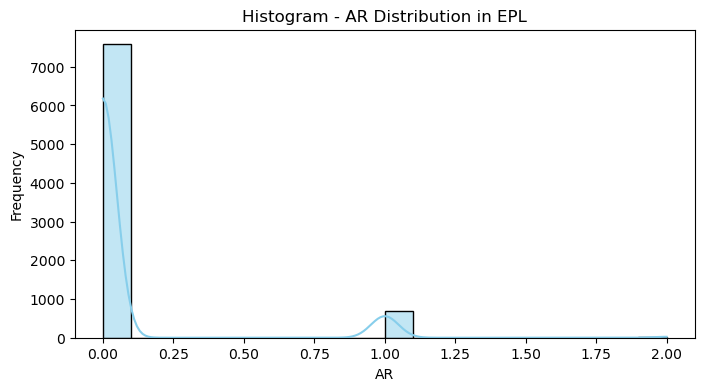

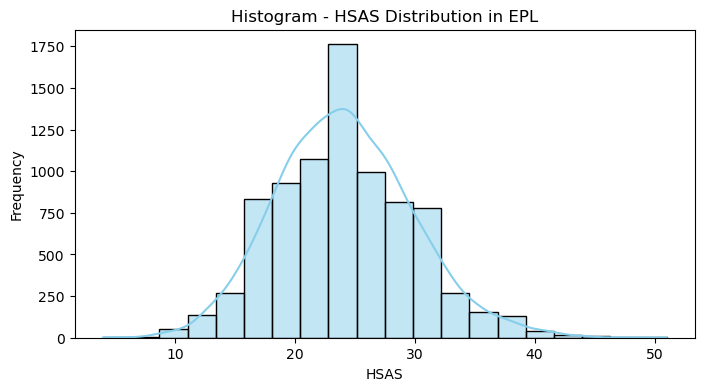

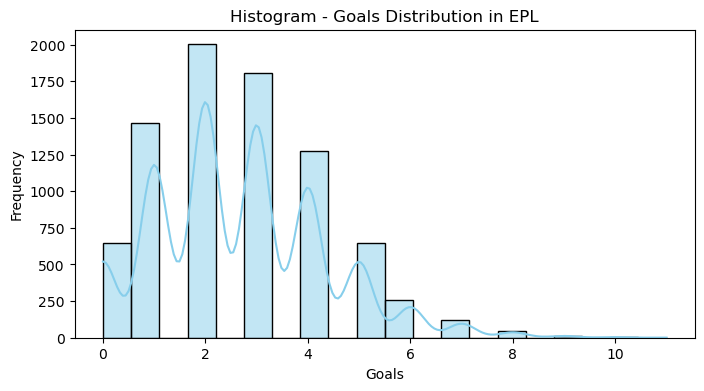

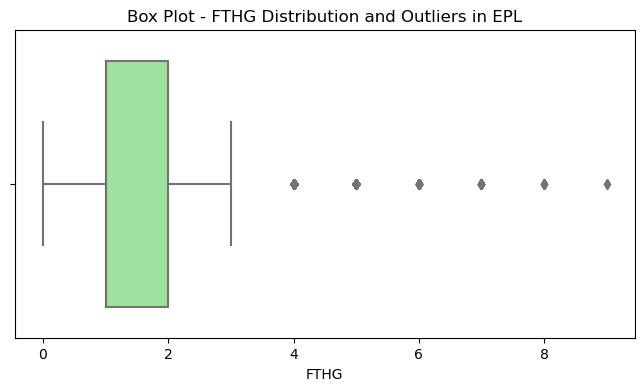

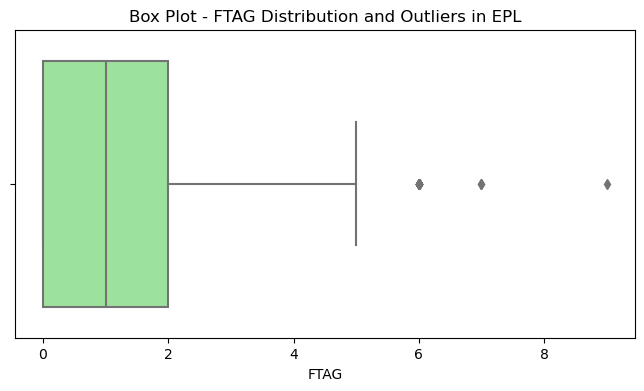

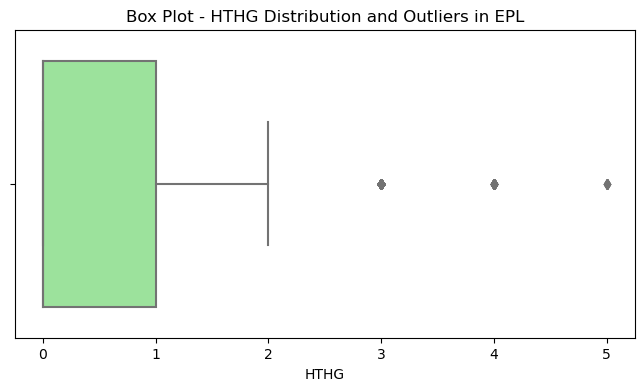

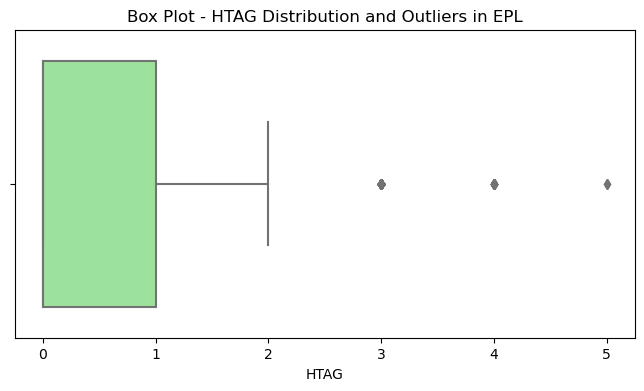

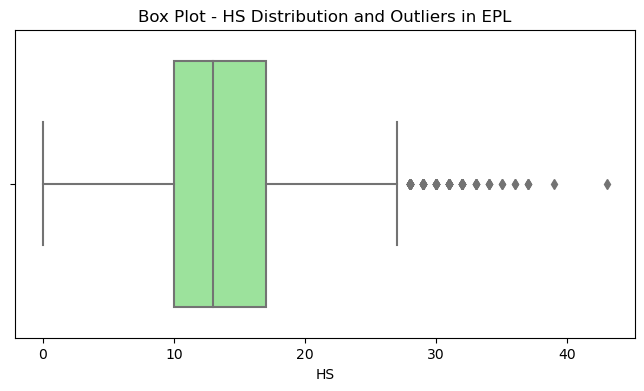

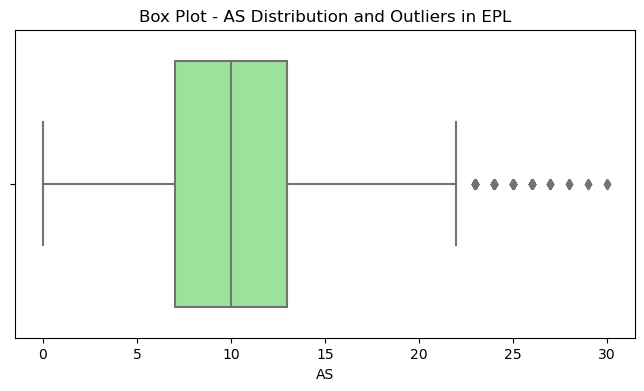

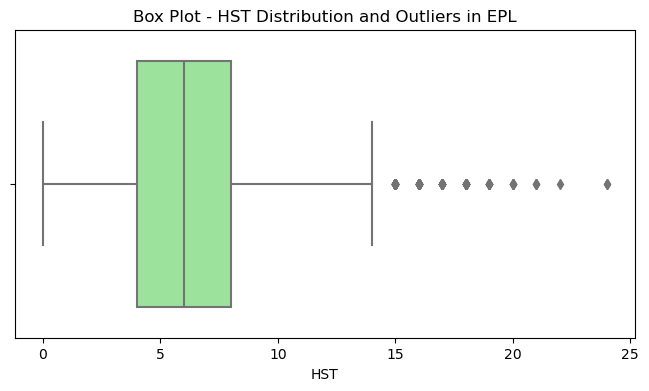

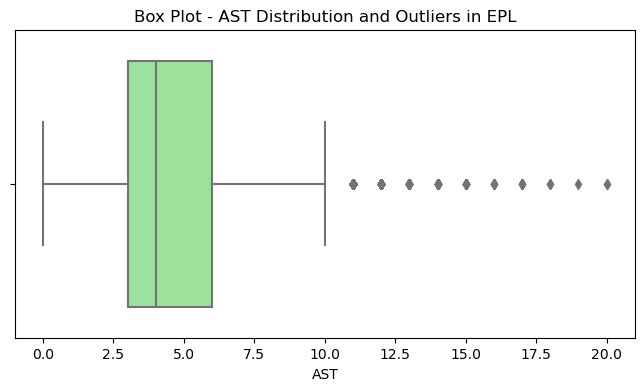

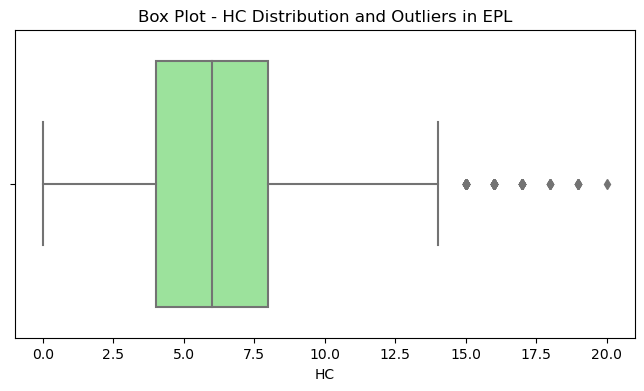

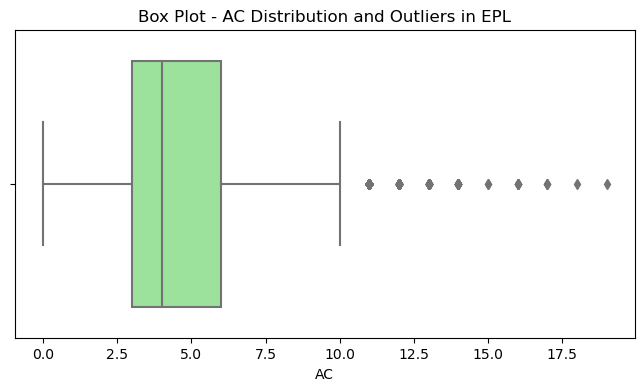

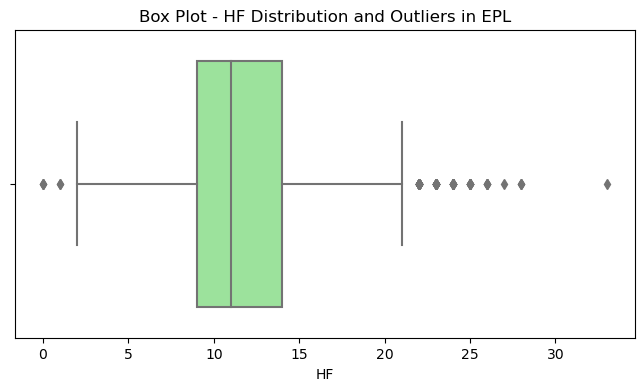

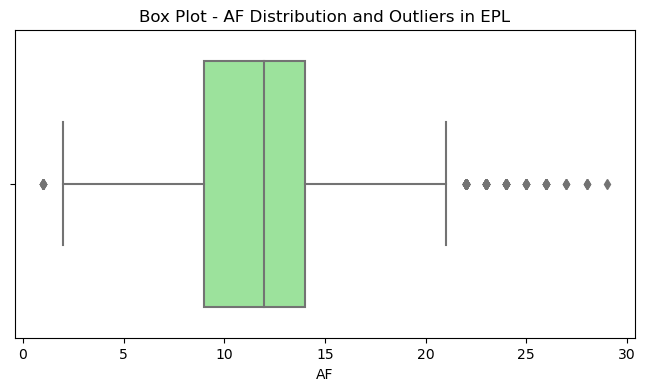

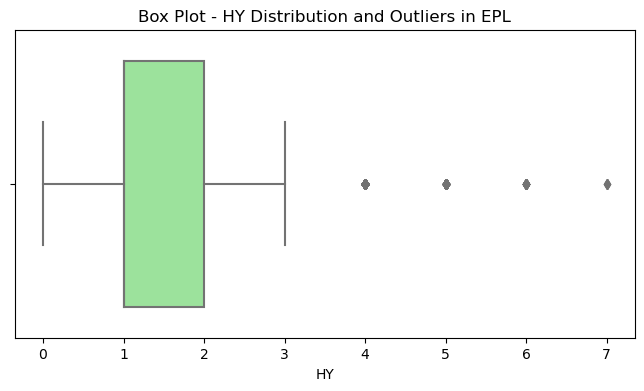

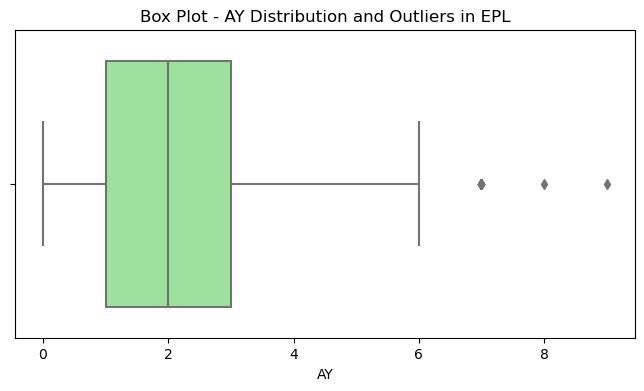

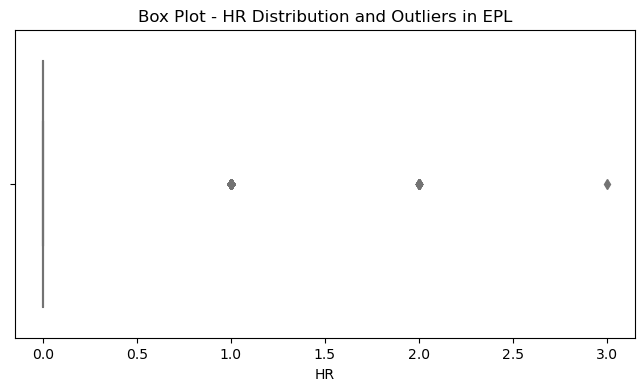

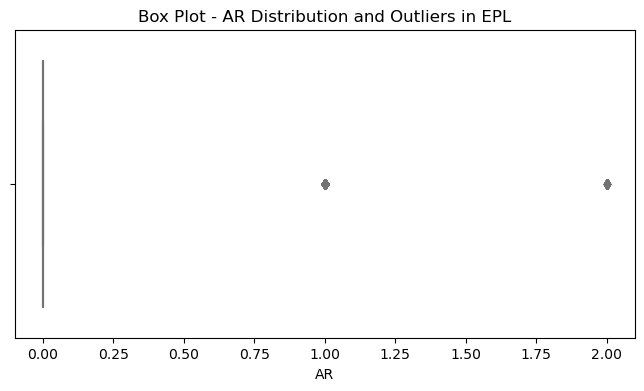

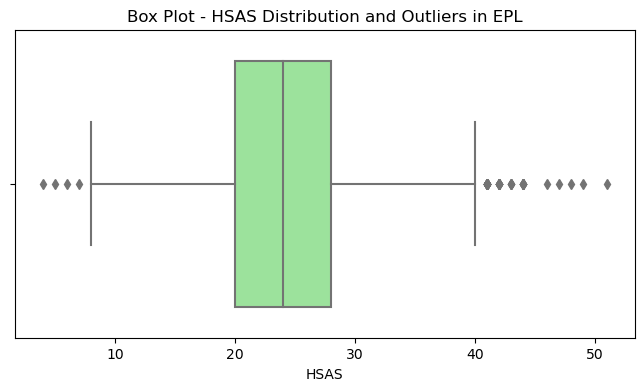

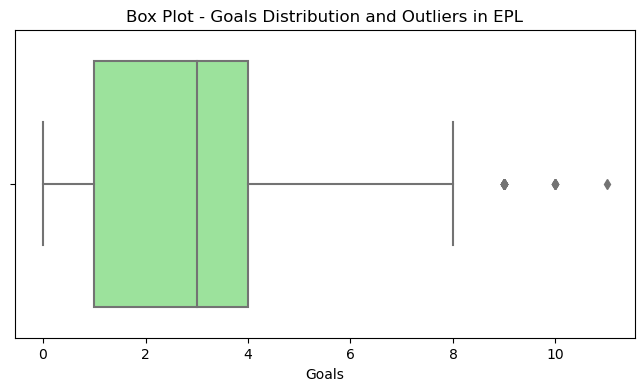

In [478]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram - {column} Distribution in EPL')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot - {column} Distribution and Outliers in EPL')
    plt.xlabel(column)
    plt.show()

## Exploring NumPy

Task 5: Basic NumPy Operations
1. Create a NumPy array 'arr' with values from 1 to 10.
2. Create another NumPy array 'arr2' with values from 11 to 20.
3. Add, subtract, multiply, and divide 'arr' and 'arr2'. Print the results.

In [479]:
arr = np.arange(1, 11)
# Create another NumPy array 'arr2' with values from 11 to 20.
arr2 = np.arange(11, 21)
# Add, subtract, multiply, and divide 'arr' and 'arr2'. Print the results.
addition_result = arr + arr2
subtraction_result = arr - arr2
multiplication_result = arr * arr2
division_result = arr / arr2

print("Array Addition Result:")
print(addition_result)

print("\nArray Subtraction Result:")
print(subtraction_result)

print("\nArray Multiplication Result:")
print(multiplication_result)

print("\nArray Division Result:")
print(division_result)


Array Addition Result:
[12 14 16 18 20 22 24 26 28 30]

Array Subtraction Result:
[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]

Array Multiplication Result:
[ 11  24  39  56  75  96 119 144 171 200]

Array Division Result:
[0.09090909 0.16666667 0.23076923 0.28571429 0.33333333 0.375
 0.41176471 0.44444444 0.47368421 0.5       ]


Task 6: Array Manipulation
1. Reshape 'arr' into a 2x5 matrix.
2. Transpose the matrix obtained in the previous step.
3. Flatten the transposed matrix into a 1D array.
4. Stack 'arr' and 'arr2' vertically. Print the result.

In [480]:
arr_reshaped = arr.reshape(2, 5)

# 2. Transpose the matrix obtained in the previous step.
arr_transposed = arr_reshaped.T

# 3. Flatten the transposed matrix into a 1D array.
arr_flattened = arr_transposed.flatten()

# 4. Stack 'arr' and 'arr2' vertically. Print the result.
stacked_result = np.vstack((arr, arr2))

# Print results
print("Reshaped Matrix:")
print(arr_reshaped)

print("\nTransposed Matrix:")
print(arr_transposed)

print("\nFlattened Array:")
print(arr_flattened)

print("\nVertically Stacked Result:")
print(stacked_result)

Reshaped Matrix:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

Transposed Matrix:
[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]

Flattened Array:
[ 1  6  2  7  3  8  4  9  5 10]

Vertically Stacked Result:
[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]


Task 7: Statistical Operations
1. Calculate the mean, median, and standard deviation of 'arr'.
2. Find the maximum and minimum values in 'arr'.
3. Normalize 'arr' (subtract the mean and divide by the standard deviation).

In [481]:
arr = np.arange(1, 11)

# 1. Calculate the mean, median, and standard deviation of 'arr'.
mean_arr = np.mean(arr)
median_arr = np.median(arr)
std_dev_arr = np.std(arr)

# 2. Find the maximum and minimum values in 'arr'.
max_value = np.max(arr)
min_value = np.min(arr)

# 3. Normalize 'arr' (subtract the mean and divide by the standard deviation).
normalized_arr = (arr - mean_arr) / std_dev_arr

# Print results
print("Mean of 'arr':", mean_arr)
print("Median of 'arr':", median_arr)
print("Standard Deviation of 'arr':", std_dev_arr)

print("\nMaximum value in 'arr':", max_value)
print("Minimum value in 'arr':", min_value)

print("\nNormalized 'arr':", normalized_arr)

Mean of 'arr': 5.5
Median of 'arr': 5.5
Standard Deviation of 'arr': 2.8722813232690143

Maximum value in 'arr': 10
Minimum value in 'arr': 1

Normalized 'arr': [-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


Task 8: Boolean Indexing
1. Create a boolean array 'bool_arr' for elements in 'arr' greater than 5.
2. Use 'bool_arr' to extract the elements from 'arr' that are greater than 5.

In [482]:
arr = np.arange(1, 11)

# 1. Create a boolean array 'bool_arr' for elements in 'arr' greater than 5.
bool_arr = arr > 5

# 2. Use 'bool_arr' to extract the elements from 'arr' that are greater than 5.
filtered_arr = arr[bool_arr]

# Print results
print("Original Array:")
print(arr)

print("\nBoolean Array 'bool_arr' for elements > 5:")
print(bool_arr)

print("\nFiltered Array with elements > 5:")
print(filtered_arr)

Original Array:
[ 1  2  3  4  5  6  7  8  9 10]

Boolean Array 'bool_arr' for elements > 5:
[False False False False False  True  True  True  True  True]

Filtered Array with elements > 5:
[ 6  7  8  9 10]


Task 9: Random Module
1. Generate a 3x3 matrix with random values between 0 and 1.
2. Create an array of 10 random integers between 1 and 100.
3. Shuffle the elements of 'arr' randomly.

In [483]:
import numpy as np

# 1. Generate a 3x3 matrix with random values between 0 and 1.
random_matrix = np.random.random((3, 3))

# 2. Create an array of 10 random integers between 1 and 100.
random_integers = np.random.randint(1, 101, 10)

# 3. Shuffle the elements of 'arr' randomly.
arr = np.arange(1, 11)
np.random.shuffle(arr)

# Print results
print("1. 3x3 Matrix with Random Values between 0 and 1:")
print(random_matrix)

print("\n2. Array of 10 Random Integers between 1 and 100:")
print(random_integers)

print("\n3. Shuffled Array 'arr':")
print(arr)


1. 3x3 Matrix with Random Values between 0 and 1:
[[0.68656434 0.12022856 0.57032555]
 [0.74314706 0.77887946 0.46219316]
 [0.03279692 0.39758472 0.61028445]]

2. Array of 10 Random Integers between 1 and 100:
[25 69 54 25 65 56 20 64 32 87]

3. Shuffled Array 'arr':
[10  8  7  4  3  1  2  6  5  9]


Task 10: Universal Functions (ufunc)
1. Apply the square root function to all elements in 'arr'.
2. Use the exponential function to calculate exex for each element in 'arr'.

In [484]:
import numpy as np

# Given array
arr = np.arange(1, 11)

# 1. Apply the square root function to all elements in 'arr'.
sqrt_result = np.sqrt(arr)

# 2. Use the exponential function to calculate e^x for each element in 'arr'.
exp_result = np.exp(arr)

# Print results
print("Original Array:")
print(arr)

print("\n1. Square Root Result:")
print(sqrt_result)

print("\n2. Exponential Result (e^x):")
print(exp_result)


Original Array:
[ 1  2  3  4  5  6  7  8  9 10]

1. Square Root Result:
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]

2. Exponential Result (e^x):
[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]


Task 11: Linear Algebra Operations
1. Create a 3x3 matrix 'mat_a' with random values.
2. Create a 3x1 matrix 'vec_b' with random values.
3. Multiply 'mat_a' and 'vec_b' using the dot product.

In [485]:
import numpy as np

# 1. Create a 3x3 matrix 'mat_a' with random values.
mat_a = np.random.random((3, 3))

# 2. Create a 3x1 matrix 'vec_b' with random values.
vec_b = np.random.random((3, 1))

# 3. Multiply 'mat_a' and 'vec_b' using the dot product.
result = np.dot(mat_a, vec_b)

# Print results
print("Matrix 'mat_a':")
print(mat_a)

print("\nMatrix 'vec_b':")
print(vec_b)

print("\nDot Product Result:")
print(result)


Matrix 'mat_a':
[[0.88039832 0.93739167 0.94308119]
 [0.77184355 0.18923985 0.75745501]
 [0.50014275 0.4101982  0.67889725]]

Matrix 'vec_b':
[[0.83122337]
 [0.08370322]
 [0.35854201]]

Dot Product Result:
[[1.14840458]
 [0.92899382]
 [0.69347843]]


Task 12: Broadcasting
1. Create a 2D array 'matrix' with values from 1 to 9.
2. Subtract the mean of each row from each element in that row.

In [486]:
import numpy as np

# 1. Create a 2D array 'matrix' with values from 1 to 9.
matrix = np.arange(1, 10).reshape(3, 3)

# 2. Subtract the mean of each row from each element in that row.
mean_per_row = np.mean(matrix, axis=1, keepdims=True)
result = matrix - mean_per_row

# Print results
print("Original 2D Array 'matrix':")
print(matrix)

print("\nMean of Each Row:")
print(mean_per_row)

print("\nResult after Subtracting Mean from Each Element in Each Row:")
print(result)


Original 2D Array 'matrix':
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Mean of Each Row:
[[2.]
 [5.]
 [8.]]

Result after Subtracting Mean from Each Element in Each Row:
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
